# Multiclass oversampling

In this notebook, multiclass oversampling is illustrated. The number of oversampling techniques supporting multiclass oversampling is limited, most of the oversamplers are formulated for binary oversampling problems. However, multiclass oversampling can be implemented as binary oversampling applied repeatedly to various combinations of classes. This approach is not supported by all binary oversamplers, for example, by those changing the majority samples. In the current version of the ```smote_variants``` package, there are 61 binary oversamplers which can be used for multiclass oversampling. The list of these can be queried by the function ```get_multiclass_oversamplers```.

In [1]:
import smote_variants as sv
import numpy as np

2022-08-16 15:04:40.602012: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:04:40.606632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 15:04:40.606670: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from smote_variants.visualization import (plot_raw, 
                                          plot_oversampled, 
                                          plot_sampling,
                                          plot_sampling_raw, 
                                          plot_comparison, 
                                          plot_comparison_raw)

from smote_variants.datasets import load_illustration_3_class

In [3]:
# loading the dataset
dataset= load_illustration_3_class()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalanced nature

The imbalanced nature of an example multiclass dataset is illustrated.

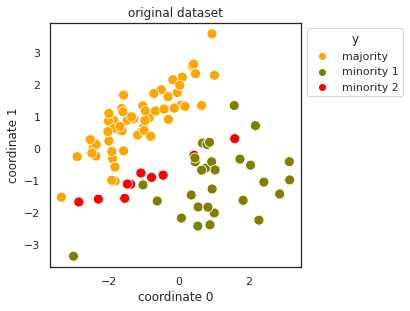

In [4]:
fig = plot_raw(X, y, "original dataset")

In [5]:
# printing the number of samples

for i in np.unique(y):
    print("class %d - samples: %d" % (i, np.sum(y == i)))

class 0 - samples: 60
class 1 - samples: 30
class 2 - samples: 10


## Oversampling

In this section multiclass oversampling is driven by the binary oversampler ```distance_SMOTE```.

In [6]:
# chosing an oversampler supporting multiclass oversampling

oversampler= sv.MulticlassOversampling('distance_SMOTE')

In [7]:
X_samp, y_samp= oversampler.sample(X, y)

2022-08-16 15:04:43,075:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2022-08-16 15:04:43,078:INFO:MulticlassOversampling: Sampling minority class with label: 1
2022-08-16 15:04:43,080:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'uniform', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'distance_SMOTE'}")
2022-08-16 15:04:43,080:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-08-16 15:04:43,082:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-08-16 15:04:43,084:INFO:distance_SMOTE: simplex sampling with n_dim 2
2022-08-16 15:04:43,086:INFO:MulticlassOversampling: Sampling minority class with label: 2
2022-08-16 15:04:43,087:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.

## Illustrating the outcome

In [8]:
# printing the number of samples

for i in np.unique(y_samp):
    print("class %d - samples: %d" % (i, np.sum(y_samp == i)))

class 0 - samples: 60
class 1 - samples: 60
class 2 - samples: 60


In [9]:
# filtering for new samples

X_new, y_new= X_samp[len(X):], y_samp[len(y):]

In [10]:
# printing the number of new samples

for i in np.unique(y_samp):
    print("class %d - samples: %d" % (i, np.sum(y_new == i)))

class 0 - samples: 0
class 1 - samples: 30
class 2 - samples: 50


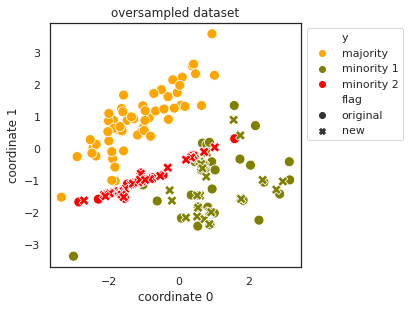

In [11]:
_ = plot_oversampled(X, y, X_samp, y_samp, title="oversampled dataset")

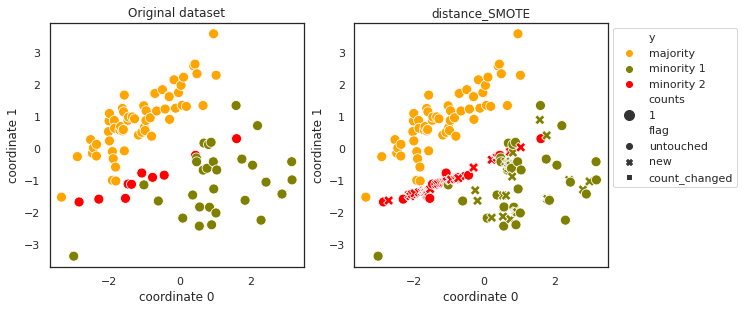

In [12]:
fig = plot_sampling_raw(X=X, y=y, X_samp=X_samp, y_samp=y_samp, title="distance_SMOTE")

In [13]:
oversampler= sv.MulticlassOversampling('SMOTE')

X_samp1, y_samp1 = oversampler.sample(X, y)

2022-08-16 15:04:44,217:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2022-08-16 15:04:44,219:INFO:MulticlassOversampling: Sampling minority class with label: 1
2022-08-16 15:04:44,220:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'uniform', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2022-08-16 15:04:44,221:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-08-16 15:04:44,223:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-08-16 15:04:44,225:INFO:SMOTE: simplex sampling with n_dim 2
2022-08-16 15:04:44,229:INFO:MulticlassOversampling: Sampling minority class with label: 2
2022-08-16 15:04:44,230:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.45454545454545453, 'n_neighbors': 5, 'nn_params': {}, 

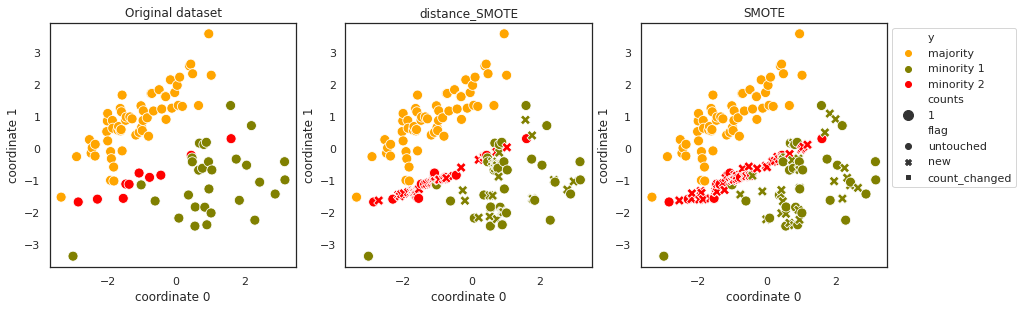

In [14]:
fig = plot_comparison_raw(X=X, y=y, X_samp0=X_samp, y_samp0=y_samp, X_samp1=X_samp1, y_samp1=y_samp1, title0="distance_SMOTE", title1="SMOTE")